# Lab 4: Comparação Justa

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

## 1. Simulação

In [20]:
from channel import BSC
from encoder import NaiveEncoder, ConvolutionalEncoder, ConvEncoderEuclidean
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

### 1.1. Naive Encoder

Taxa = 1

In [21]:
naive_sim = safe_load('lab4_values/naive.pickle', None)
naive_rate = 1

### 1.2. Convolutional Encoder - BSC

Taxa = 1/3

In [22]:
conv_bsc_sim = safe_load('lab4_values/conv_bsc.pickle', None)
conv_bsc_rate = 1/3

In [23]:
conv_awgn_sim = []
for m in [3,4,6]:
    agwn_sim = safe_load(f'lab4_values/conv{m}_awgn.pickle', None)
    conv_awgn_sim.append(agwn_sim)
conv_bsc_rate = 1/3

### 1.3 Hamming

Taxa = 4/7

In [24]:
hamming_sim = list(zip(p, safe_load('lab4_values/hamming.pickle', None)))
hamming_rate = 4/7

### 1.4 Alternative Hamming

Taxa = 11/15

In [25]:
alt_sim = list(zip(p, safe_load('lab4_values/alternative.pickle', None)))
alt_rate = 11/15

### 1.5 Código Cíclico (12,7)

Taxa = 7/12

In [26]:
cyclic_sim = list(zip(p, safe_load('lab4_values/12_7.pickle', None)))
cyclic_rate = 7/12

## 2. Comparações

In [27]:
nmg = [
    (3, 3, np.array([[1,0,1,1], [1,1,0,1], [1,1,1,1]])),
    (3, 4, np.array([[1,0,1,0,1], [1,1,0,1,1], [1,1,1,1,1]])), 
    (3, 6, np.array([[1,0,0,1,1,1,1], [1,0,1,0,1,1,1], [1,1,0,1,1,0,1]])),
]

### 2.1 Tempo de codificação

Para codificação:
  - m = 3, t = 6.9 s/1000000 = 6.9 us
  - m = 4, t = 7.5 s/1000000 = 7.5 us
  - m = 6, t = 7.8 s/1000000 = 7.8 us

In [ ]:
n, m, G = nmg[0]
enc = ConvolutionalEncoder(n, m, G)
word = np.ones((1_000_000,), dtype=int)
encoded = enc.encode(word)

In [ ]:
n, m, G = nmg[1]
enc = ConvolutionalEncoder(n, m, G)
word = np.ones((1_000_000,), dtype=int)
encoded = enc.encode(word)

In [ ]:
n, m, G = nmg[2]
enc = ConvolutionalEncoder(n, m, G)
word = np.ones((1_000_000,), dtype=int)
encoded = enc.encode(word)

### 2.2 Tempo de Decodificação - BSC

Para decodificação:
  - m = 3, t = 2.2 s/30000 = 73 us
  - m = 4, t = 3.8 s/30000 = 126 us
  - m = 6, t = 16.7 s/30000 = 557 us

In [ ]:
import random
word = np.array(random.choices([0,1], k=30_000))

In [ ]:
n, m, G = nmg[0]
enc = ConvolutionalEncoder(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:01<00:00, 5215.82it/s]


In [ ]:
n, m, G = nmg[1]
enc = ConvolutionalEncoder(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:03<00:00, 2608.67it/s]


In [ ]:
n, m, G = nmg[2]
enc = ConvolutionalEncoder(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:16<00:00, 599.58it/s]


### 2.3 Tempo de Decodificação - BPSK_AWGN

Para decodificação:
  - m = 3, t = 2.3 s/30000 = 77 us
  - m = 4, t = 4.1 s/30000 = 137 us
  - m = 6, t = 17.8 s/30000 = 593 us

In [ ]:
n, m, G = nmg[0]
enc = ConvEncoderEuclidean(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:01<00:00, 5000.41it/s]


In [ ]:
n, m, G = nmg[1]
enc = ConvEncoderEuclidean(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:04<00:00, 2401.08it/s]


In [ ]:
n, m, G = nmg[2]
enc = ConvEncoderEuclidean(n, m, G)
decoded = enc.decode(word)

100%|██████████| 10000/10000 [00:17<00:00, 563.02it/s]


### 2.4 Converter p(Eb/N0)

In [29]:
from scipy import special as sp
from math import sqrt

def qfunc(x):
    return 0.5-0.5*sp.erf(x/sqrt(2))

def invqfunc(x):
    return sqrt(2)*sp.erfinv(1-2*x)

def translate(p, R, db=True):
    """Eb/N0 dado probabilidade p do BSC(BPSK)"""
    eb_n0 = map(lambda x: (invqfunc(x)**2)/(2*R), p)
    if db:
        eb_n0 = map(lambda x: 10*np.log10(x), eb_n0)
    return list(eb_n0)



In [65]:
# Naive
naive_eb_n0 = translate([k for k,v in naive_sim[1:]], naive_rate)
naive_prob = [v for k,v in naive_sim[1:]]

# Convolutional
conv_bsc_eb_n0 = []
conv_bsc_prob = []
for sim in conv_bsc_sim:
    conv_bsc_eb_n0.append(translate([k for k,v in sim[1:]], conv_bsc_rate))
    conv_bsc_prob.append([v for k,v in sim[1:]])

# Convolutional AWGN
conv_awgn_eb_n0 = []
conv_awgn_prob = []
for sim in conv_awgn_sim:
    conv_awgn_eb_n0.append([element[2] for element in sim])
    conv_awgn_prob.append([element[1] for element in sim])

# Hamming
hamming_eb_n0 = translate([k for k,v in hamming_sim[1:]], hamming_rate)
hamming_prob = [v for k,v in hamming_sim[1:]]

# Alternative
alt_eb_n0 = translate([k for k,v in alt_sim[1:]], alt_rate)
alt_prob = [v for k,v in alt_sim[1:]]

# Cyclic
cyclic_eb_n0 = translate([k for k,v in cyclic_sim[1:]], cyclic_rate)
cyclic_prob = [v for k,v in cyclic_sim[1:]]

### 2.5 Gráfico com convolucionais

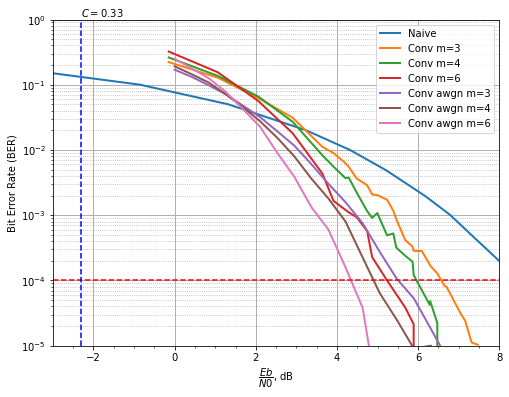

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
lw = 2

plt.grid(visible=True, which='major', axis='both', linewidth=1)
plt.grid(visible=True, which='minor', axis='y', linestyle='dotted')

# Naive
plt.plot(naive_eb_n0, naive_prob, linewidth=lw)

# Primeiro
prob = conv_bsc_prob[0][:24] + conv_bsc_prob[0][26:31]
sim = conv_bsc_eb_n0[0][:24] + conv_bsc_eb_n0[0][26:31]
plt.plot(sim, prob, linewidth=lw)

# Segundo
prob = conv_bsc_prob[1][:18] + conv_bsc_prob[1][19:23]
sim = conv_bsc_eb_n0[1][:18] + conv_bsc_eb_n0[1][19:23]
plt.plot(sim, prob, linewidth=lw)

# Terceiro
prob = conv_bsc_prob[2][:6] + conv_bsc_prob[2][7:11] + conv_bsc_prob[2][12:13] + conv_bsc_prob[2][15:16] + conv_bsc_prob[2][17:19]
sim = conv_bsc_eb_n0[2][:6] + conv_bsc_eb_n0[2][7:11] + conv_bsc_eb_n0[2][12:13] + conv_bsc_eb_n0[2][15:16] + conv_bsc_eb_n0[2][17:19]
plt.plot(sim, prob, linewidth=lw)

# Awgn
for i in range(3):
    plt.plot(conv_awgn_eb_n0[i], conv_awgn_prob[i], linewidth=lw)

# Linha
plt.plot([-3,10], [1e-4,1e-4], color='red', linestyle='dashed')

# Linhas verticais
r = 1/3
snr = 2**(2*r)-1
snr_db = 10*np.log10(snr)
plt.plot([snr_db, snr_db], [1e-5, 1], color='blue', linestyle='dashed')
plt.text(snr_db, 1.1, f'$C={float(r):.2}$')

ax.set_yscale('log')
# ax.set_xscale('log')
# ax.invert_xaxis()
plt.ylim(1e-5, 1)
plt.xlim(-3,8)
ax.legend(['Naive'] + [f'Conv m={m}' for m in [3,4,6]] + [f'Conv awgn m={m}' for m in [3,4,6]])
plt.ylabel('Bit Error Rate (BER)')
plt.xlabel(r'$\dfrac{Eb}{N0}$, dB')
plt.minorticks_on()
plt.show()

### 2.6 Gráfico com os Labs passados 

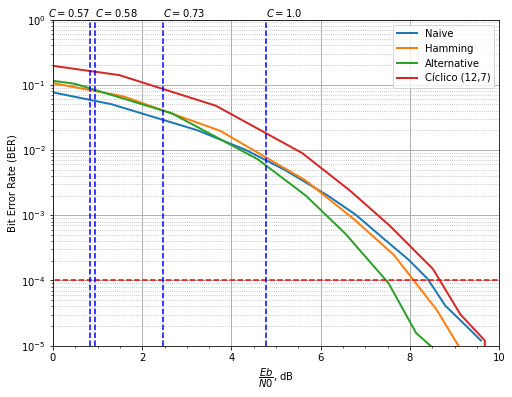

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
lw = 2

plt.grid(visible=True, which='major', axis='both', linewidth=1)
plt.grid(visible=True, which='minor', axis='y', linestyle='dotted')

plt.plot(naive_eb_n0, naive_prob, linewidth=lw)
plt.plot(hamming_eb_n0, hamming_prob, linewidth=lw)
plt.plot(alt_eb_n0, alt_prob, linewidth=lw)
plt.plot(cyclic_eb_n0, cyclic_prob, linewidth=lw)

# Linha
plt.plot([-3,10], [1e-4,1e-4], color='red', linestyle='dashed')

# Linhas verticais
Rs = set([naive_rate, hamming_rate, alt_rate, cyclic_rate])
for i, r in enumerate(Rs):
    snr = 2**(2*r)-1
    snr_db = 10*np.log10(snr)
    plt.plot([snr_db, snr_db], [1e-5, 1], color='blue', linestyle='dashed')
    if i == 0:
        plt.text(snr_db, 1.1, f'$C={float(r):.2}$', ha='right')
    else:
        plt.text(snr_db, 1.1, f'$C={float(r):.2}$')

ax.set_yscale('log')
# ax.set_xscale('log')
# ax.invert_xaxis()
plt.ylim(1e-5, 1)
plt.xlim(0,10)
ax.legend(['Naive', 'Hamming', 'Alternative', 'Cíclico (12,7)'])
plt.ylabel('Bit Error Rate (BER)')
plt.xlabel(r'$\dfrac{Eb}{N0}$, dB')
plt.minorticks_on()
plt.show()

### 2.7 Gráfico com todos

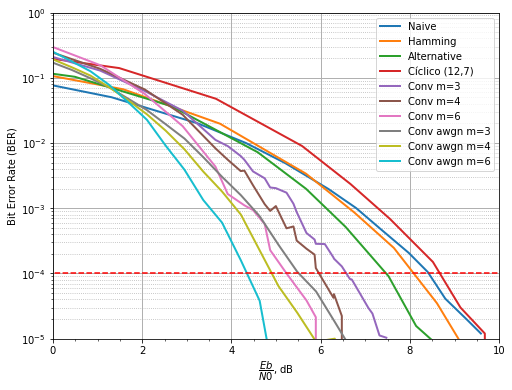

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
lw = 2

plt.grid(visible=True, which='major', axis='both', linewidth=1)
plt.grid(visible=True, which='minor', axis='y', linestyle='dotted')

# Naive
plt.plot(naive_eb_n0, naive_prob, linewidth=lw)
plt.plot(hamming_eb_n0, hamming_prob, linewidth=lw)
plt.plot(alt_eb_n0, alt_prob, linewidth=lw)
plt.plot(cyclic_eb_n0, cyclic_prob, linewidth=lw)


# Primeiro
prob = conv_bsc_prob[0][:24] + conv_bsc_prob[0][26:31]
sim = conv_bsc_eb_n0[0][:24] + conv_bsc_eb_n0[0][26:31]
plt.plot(sim, prob, linewidth=lw)

# Segundo
prob = conv_bsc_prob[1][:18] + conv_bsc_prob[1][19:23]
sim = conv_bsc_eb_n0[1][:18] + conv_bsc_eb_n0[1][19:23]
plt.plot(sim, prob, linewidth=lw)

# Terceiro
prob = conv_bsc_prob[2][:6] + conv_bsc_prob[2][7:11] + conv_bsc_prob[2][12:13] + conv_bsc_prob[2][15:16] + conv_bsc_prob[2][17:19]
sim = conv_bsc_eb_n0[2][:6] + conv_bsc_eb_n0[2][7:11] + conv_bsc_eb_n0[2][12:13] + conv_bsc_eb_n0[2][15:16] + conv_bsc_eb_n0[2][17:19]
plt.plot(sim, prob, linewidth=lw)

# Awgn
for i in range(3):
    plt.plot(conv_awgn_eb_n0[i], conv_awgn_prob[i], linewidth=lw)

# Linha
plt.plot([-3,10], [1e-4,1e-4], color='red', linestyle='dashed')

ax.set_yscale('log')
# ax.set_xscale('log')
# ax.invert_xaxis()
plt.ylim(1e-5, 1)
plt.xlim(0,10)
ax.legend(['Naive', 'Hamming', 'Alternative', 'Cíclico (12,7)'] + [f'Conv m={m}' for m in [3,4,6]] + [f'Conv awgn m={m}' for m in [3,4,6]])
plt.ylabel('Bit Error Rate (BER)')
plt.xlabel(r'$\dfrac{Eb}{N0}$, dB')
plt.minorticks_on()
plt.show()

### 2.8 Gráfico p(BSC) vs BER

In [97]:
# Naive
naive_p = [k for k,v in naive_sim[1:]]

# Convolutional
conv_bsc_p = []
for sim in conv_bsc_sim:
    conv_bsc_p.append([k for k,v in sim[1:]])

# Convolutional AWGN
conv_awgn_p = []
for sim in conv_awgn_sim:
    conv_awgn_p.append(translate_inverse([element[2] for element in sim],conv_bsc_rate))

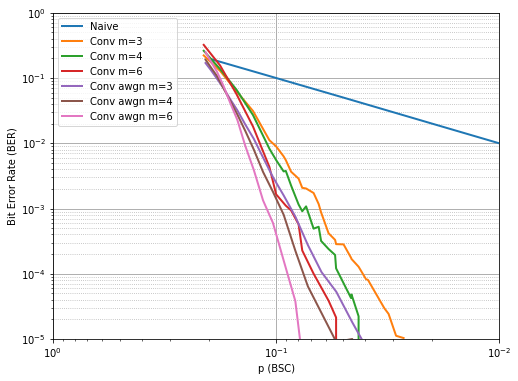

In [112]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
lw = 2

plt.grid(visible=True, which='major', axis='both', linewidth=1)
plt.grid(visible=True, which='minor', axis='y', linestyle='dotted')

# Naive
plt.plot(naive_p, naive_prob, linewidth=lw)


# Primeiro
prob = conv_bsc_prob[0][:24] + conv_bsc_prob[0][26:31]
sim = conv_bsc_p[0][:24] + conv_bsc_p[0][26:31]
plt.plot(sim, prob, linewidth=lw)

# Segundo
prob = conv_bsc_prob[1][:18] + conv_bsc_prob[1][19:23]
sim = conv_bsc_p[1][:18] + conv_bsc_p[1][19:23]
plt.plot(sim, prob, linewidth=lw)

# Terceiro
prob = conv_bsc_prob[2][:6] + conv_bsc_prob[2][7:11] + conv_bsc_prob[2][12:13] + conv_bsc_prob[2][15:16] + conv_bsc_prob[2][17:19]
sim = conv_bsc_p[2][:6] + conv_bsc_p[2][7:11] + conv_bsc_p[2][12:13] + conv_bsc_p[2][15:16] + conv_bsc_p[2][17:19]
plt.plot(sim, prob, linewidth=lw)

# Awgn
for i in range(3):
    plt.plot(conv_awgn_p[i], conv_awgn_prob[i], linewidth=lw)

# Linha
# plt.plot([-3,10], [1e-4,1e-4], color='red', linestyle='dashed')

ax.set_yscale('log')
ax.set_xscale('log')
plt.ylim(1e-5, 1)
plt.xlim(1e-2, 1)
ax.invert_xaxis()
ax.legend(['Naive'] + [f'Conv m={m}' for m in [3,4,6]] + [f'Conv awgn m={m}' for m in [3,4,6]])
plt.ylabel('Bit Error Rate (BER)')
plt.xlabel(r'p (BSC)')
plt.minorticks_on()
plt.show()

In [83]:
qfunc(sqrt(2*10**(0/10)))

0.07864960352514261

In [88]:
conv_bsc_sim

[[(0.25, 0.326875),
  (0.2110397281373741, 0.22252315511418733),
  (0.1781510674091871, 0.12865465384094296),
  (0.1503878113336714, 0.06259541984732825),
  (0.12695121127613088, 0.03131816198923949),
  (0.10716699645770002, 0.011147954207865084),
  (0.1, 0.008972222222222222),
  (0.0925564583757491, 0.006311119044279831),
  (0.09046597519092779, 0.005520259601397471),
  (0.08566697987061772, 0.003665792185889628),
  (0.07929032256570966, 0.002874212820926853),
  (0.07636765923990332, 0.0020773905494232917),
  (0.07338831440152822, 0.0020295221217911277),
  (0.06792562467171435, 0.001730813026645411),
  (0.06446644017790729, 0.0011714544123347258),
  (0.06286955252574286, 0.0008721393410316402),
  (0.05818983121450888, 0.00041704960573365975),
  (0.05441992003651937, 0.000330925728756007),
  (0.053858446906975575, 0.0002846225549143642),
  (0.04984947099327976, 0.0002819986490297279),
  (0.0461389048704261, 0.00017534418854941986),
  (0.04593906051905874, 0.0001685295197510578),
  (0.0

In [86]:
conv_awgn_sim

[[(0.07864960352514261, 0.17006701096931154, 0.0),
  (0.06884385796933429, 0.13192673098961222, 0.42105263157894735),
  (0.059594171960377695, 0.098090160882756, 0.8421052631578947),
  (0.050963325189727626, 0.0711126027857023, 1.263157894736842),
  (0.04300575812308571, 0.04776964515422338, 1.6842105263157894),
  (0.03576507541528906, 0.031936053708949794, 2.1052631578947367),
  (0.029271717619403725, 0.019393066743057887, 2.526315789473684),
  (0.023540998272068625, 0.01168362303816389, 2.9473684210526314),
  (0.01857171832886717, 0.0060625127140093, 3.3684210526315788),
  (0.014345563012533369, 0.0030254901639731983, 3.789473684210526),
  (0.010827450603624778, 0.0015844304396726058, 4.2105263157894735),
  (0.007966934458889241, 0.0007539025247201727, 4.631578947368421),
  (0.0057006595026449225, 0.000275, 5.052631578947368),
  (0.003955750589426266, 0.000106, 5.473684210526315),
  (0.002653878584983005, 5.3e-05, 5.894736842105263),
  (0.0017156340400875103, 1.8e-05, 6.3157894736842